Utilizzare i dataset precedentemente scaricati e quello relativo ai parchi della Lombardia per scrivere un notebook Python che:

In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Visualizzi i parchi di Milano e i comuni che vi fanno parte

In [4]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Parchi_regionali_e_nazionali_polygon.zip')

In [5]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/ProvCM01012021_g')

In [6]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/Com01012021_g')

In [ ]:
comuni_milano = comuni[comuni["COMUNE"] == "Milano"]
comuni_milano

In [ ]:
parchi_milano = parchi[parchi.intersects(comuni_milano.geometry.squeeze())]
parchi_milano

In [ ]:
comuni_inter = comuni[comuni.intersects(parchi_milano.unary_union)]
comuni_inter

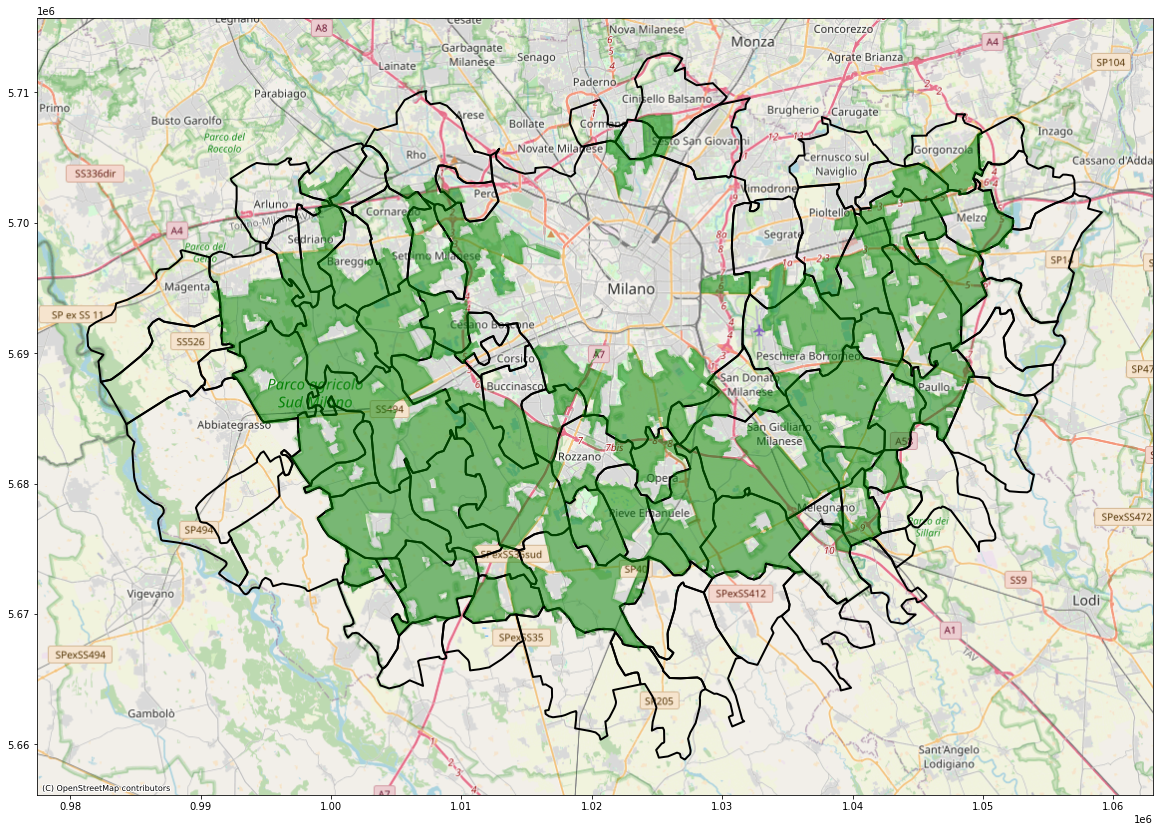

In [ ]:
ax = comuni_inter.to_crs(epsg=3857).plot(figsize= (20, 20), facecolor="none", edgecolor="k", linewidth=2)
parchi_milano.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5)
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

2. Analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

In [ ]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/ds964_nil_wm.zip')

In [ ]:
quartieri_attraversati = quartieri_milano[quartieri_milano.intersects(parchi_milano.to_crs(epsg=4326).unary_union)]
quartieri_attraversati

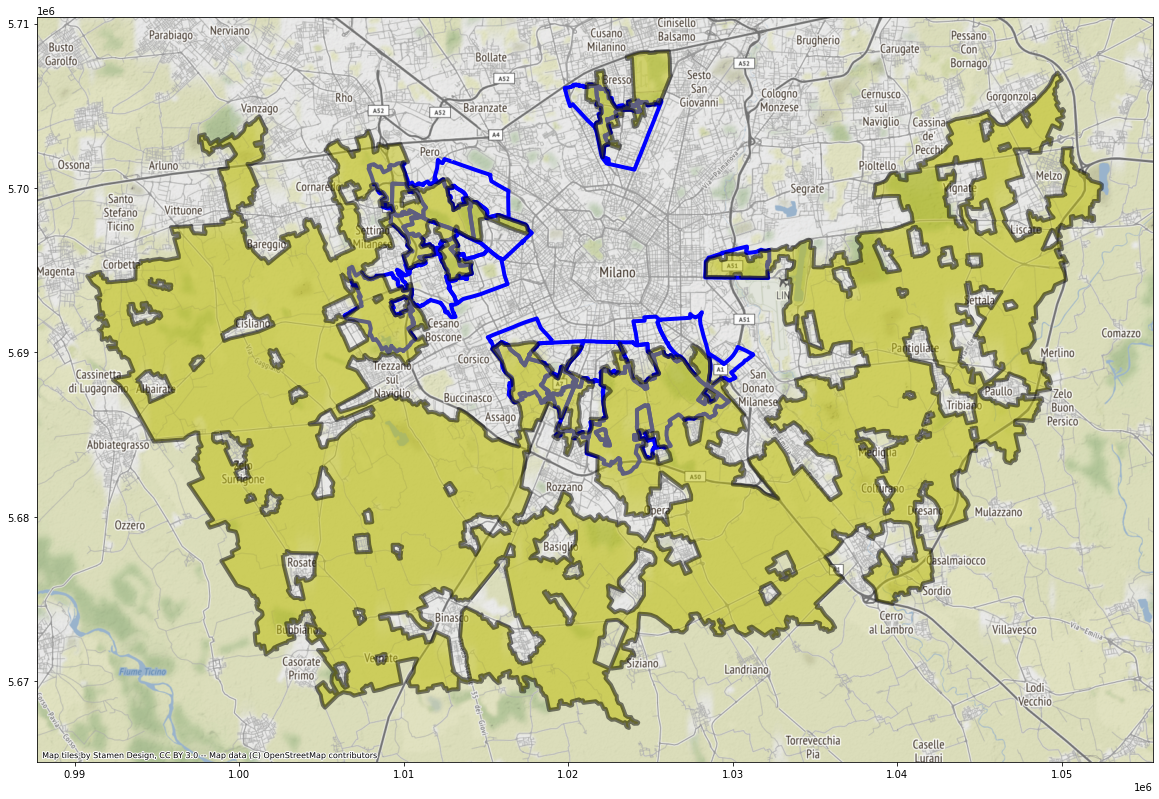

In [ ]:
ax = quartieri_attraversati.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="none", edgecolor="b", linewidth=4)
parchi_milano.to_crs(epsg=3857).plot(ax=ax, facecolor="y",linewidth=4, alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)

3. Dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

In [ ]:
parco = input('Inserire il nome di un parco lombardo: ')
parco = parchi[parchi["NOME"] == parco]
squeeze_parco = parco.geometry.squeeze()

comuni_parco = comuni[comuni.intersects(squeeze_parco)]
comuni_parco

ax = parco.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="none", edgecolor="b", linewidth=4)
comuni_parco.to_crs(epsg=3857).plot(ax=ax, facecolor="g", linewidth=4, alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)

Output hidden; open in https://colab.research.google.com to view.

4. Dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [10]:
parco1 = input('Inserire il nome di un parco lombardo: ')
parco1 = parchi[parchi["NOME"] == parco1]
squeeze_parco = parco1.geometry.squeeze()

province_parco =  province[province.intersects(squeeze_parco)]
province_parco

ax = parco1.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="none", edgecolor="b", linewidth=4)
province_parco.to_crs(epsg=3857).plot(ax=ax, facecolor="g", linewidth=4, alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)

Output hidden; open in https://colab.research.google.com to view.

5. Dato un comune, avere i parchi che ospita (elenco e mappa)

Inserire il nome di un comune lombardo: Milano
Parchi ospitati dal comune Milano: 
 20    Parco Nord Milano
21     Parco Sud Milano
Name: NOME, dtype: object


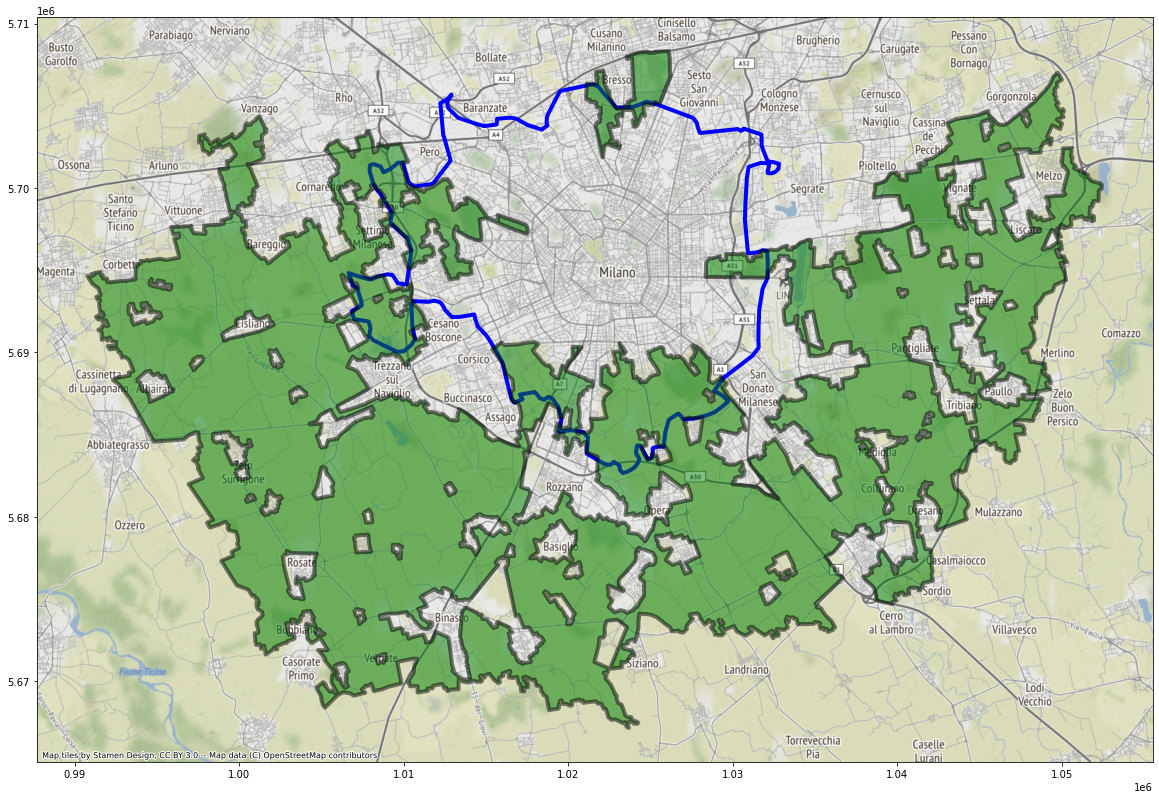

In [ ]:
n_comune = input('Inserire il nome di un comune lombardo: ')
comune = comuni[comuni["COMUNE"] == n_comune]
squeeze_comune = comune.geometry.squeeze()

parchi_comune =  parchi[parchi.intersects(squeeze_comune)]
parchi_comune

print("Parchi ospitati dal comune " + n_comune + ": \n", parchi_comune.NOME)

ax = comune.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="none", edgecolor="b", linewidth=4)
parchi_comune.to_crs(epsg=3857).plot(ax=ax, facecolor="g", linewidth=4, alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)

6. Dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

Inserire il nome di una provincia lombarda: Bergamo
Parchi opsitati nella provincia di  Bergamo : 
 0     Parco Alpi Orobie Valtellinesi
1      Parco Alpi Orobie Bergamasche
8                    Parco Adda Nord
12             Parco dell'Oglio Nord
13        Parco dei Colli di Bergamo
19                   Parco del Serio
22                    Parco Adda Sud
Name: NOME, dtype: object


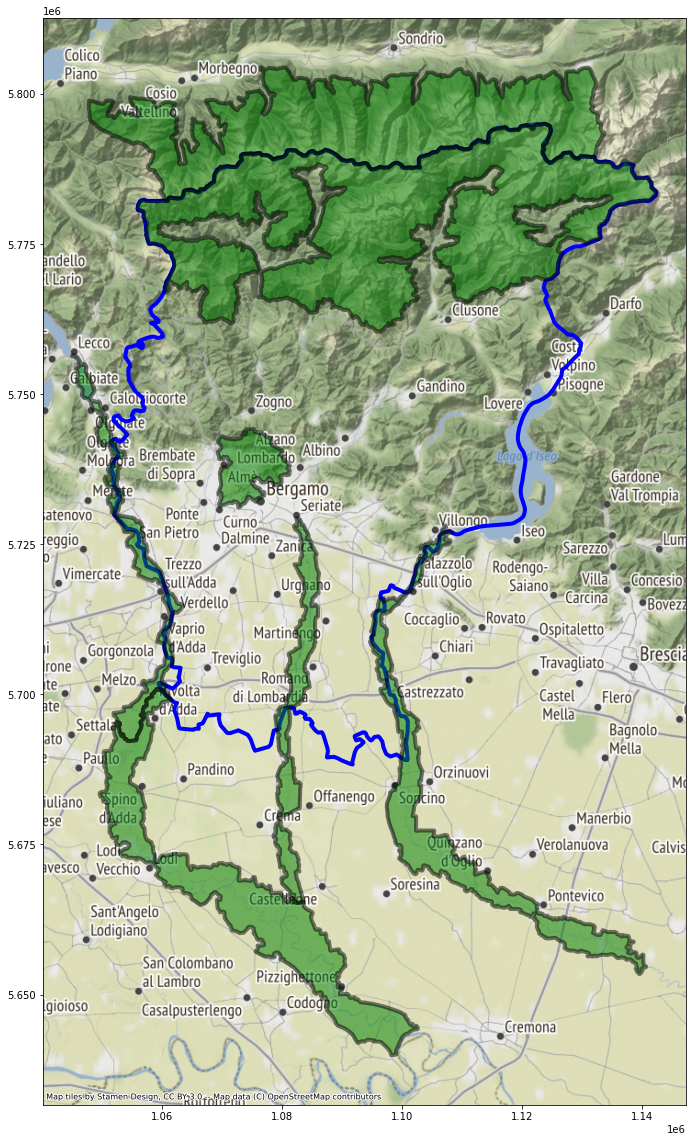

In [ ]:
n_provincia = input('Inserire il nome di una provincia lombarda: ')
provincia = province[province["DEN_UTS"] == n_provincia]
squeeze_provincia = provincia.geometry.squeeze()

parchi_nella_provincia =  parchi[parchi.intersects(squeeze_provincia)]
parchi_nella_provincia

print("Parchi opsitati nella provincia di ", n_provincia, ": \n", parchi_nella_provincia.NOME)

ax = provincia.to_crs(epsg=3857).plot(figsize=(20, 20), facecolor="none", edgecolor="b", linewidth=4)
parchi_nella_provincia.to_crs(epsg=3857).plot(ax=ax, facecolor="g", linewidth=4, alpha=0.5, edgecolor="k")
contextily.add_basemap(ax=ax)